# 認識した顔のX座表、Y座表、幅、高さを出力

In [1]:
import cv2

cascade = cv2.CascadeClassifier("data/haarcascades/haarcascade_frontalface_default.xml") #カスケードファイルの指定
gray = cv2.imread("photo3.jpg", cv2.IMREAD_GRAYSCALE) # 画像をグレイにする
faces = cascade.detectMultiScale(gray,  scaleFactor=1.3, minNeighbors=4) # 認識させる（色々引数に指定することができてここが重要になる）
print(faces)

[[128  93  64  64]
 [384  89  72  72]
 [476  98  60  60]
 [302  90  69  69]
 [ 62  95  69  69]
 [473 184  76  76]]


# 認識した顔の領域を赤線で囲う

In [5]:
import cv2
import matplotlib.pyplot as plt

cascade = cv2.CascadeClassifier("data/haarcascades/haarcascade_frontalface_default.xml") #カスケードファイルの指定
img = cv2.imread("photo3.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 画像をグレイにする
faces = cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=4) # 認識させる（色々引数に指定することができてここが重要になる）

# 赤線で囲む（画像ファイル、左上座標、右下座標、色）
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w,y+h), (0,0,255))
    
cv2.imshow("test", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(img)
# plt.show()

<img src="result.png" width=50%>

# 顔にモザイクをかける

In [12]:
import os
import sys
import shutil
from datetime import datetime
from enum import Enum, auto
import matplotlib.pyplot as plt

import tkinter, tkinter.filedialog
from PIL import Image
import cv2

Face_ICON_FILE = "smile.png"
CASCADE_FILE = "data/haarcascades/haarcascade_frontalface_default.xml"

In [15]:
def mask_face(img_cv, cascade, img_pil, mask):
    # 顔認識を実行
    faces = cascade.detectMultiScale(img_cv, scaleFactor=1.3, minNeighbors=4)
    
    #認識された顔にアイコンを貼り付け
    for(x, y, w, h) in faces:
        mask = mask.resize((w, h))
        img_pil.paste(mask, (x,y), mask)
        plt.imshow(img_pil)
        plt.show()

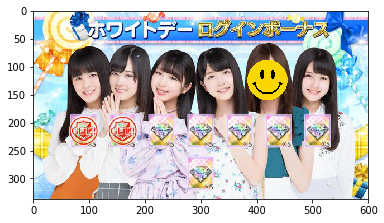

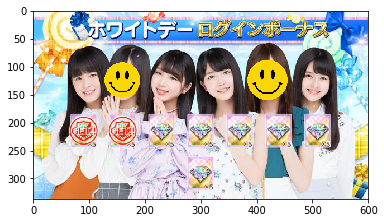

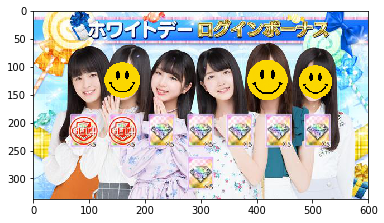

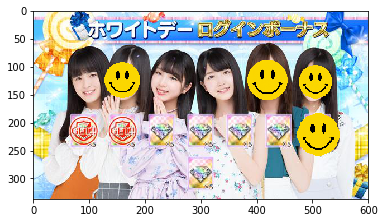

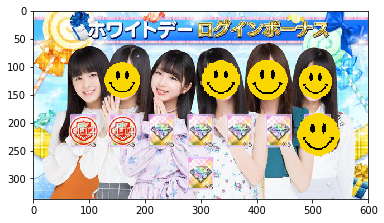

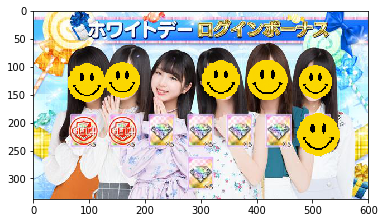

In [16]:
# メイン処理
# 顔アイコンの画像読み込み
face_icon = Image.open(Face_ICON_FILE)

# 識別器の生成
cascade = cv2.CascadeClassifier(CASCADE_FILE)

#元画像の読み込み
img_dir_path = "photo3.jpg"
img_path = os.path.join(img_dir_path)
img_pil = Image.open(img_path)

# 顔認識用にグレースケール化
img_cv = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

#顔を隠す
mask_face(img_cv, cascade, img_pil, face_icon)


## 生成した画像ファイルを保存したい場合
[こちらのQiita](https://qiita.com/cyq04000/items/eff67f9e07b7ae6d2564)を参照